<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task6/blob/main/Assignment_7(SalaryDiscrimination).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

**Salary Discrimination**

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.


The data in the file, by column:


1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.




In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [3]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [4]:
df=df.drop_duplicates()  #deletes if any duplicate records are found
df.shape

(52, 6)

In [5]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

**EDA**

In [6]:
##we compare every feature with the target

# 1.Sex v/s Salary
#we can check corr to check if there is linear relation or not
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [7]:

# 2.Rank v/s Salary
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


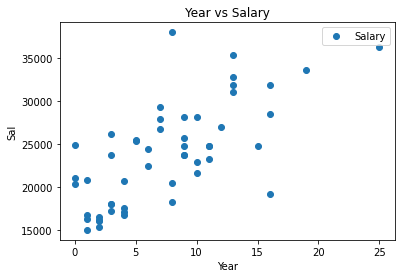

In [8]:
# 3. Year v/s Salary
#we use scatter plot comparing 2 cont variables
import matplotlib.pyplot as plt
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Sal')
plt.show()

In [9]:
#there is a +ve linear relationship, also can check the correlation
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [10]:
# 4. Degree v/s Salary
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


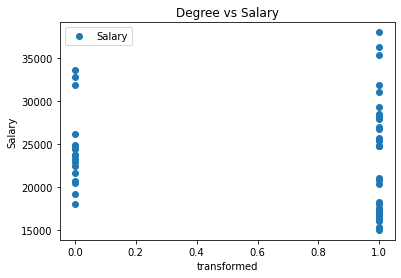

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [12]:
#corr is -0.06 so there is no linear relation
#so now we have to transform the data...we can try x^2
import numpy as np
df['transformed'] = np.square(df['Degree']) # transformation of x to (x)^2
df.plot(x='transformed', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('transformed')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


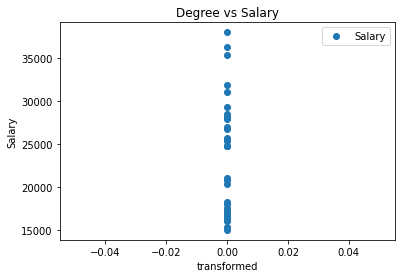

,transformed,Salary
transformed,NaN,NaN
Salary,NaN,1.0


In [14]:
#corr is -0.06 so there is no linear relation
#so we can try log(x)
import numpy as np
df['transformed'] = np.log(df['Degree']) # transformation of x to log(x)
df.plot(x='transformed', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('transformed')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()

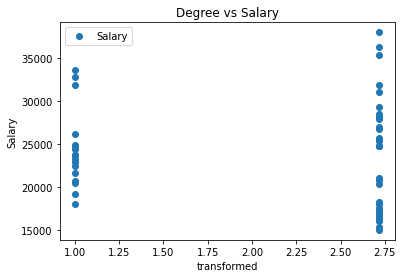

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [17]:
# there is no linear relation
#so we can try e(x)
import numpy as np
df['transformed'] = np.exp(df['Degree']) # transformation of x to e(x)
df.plot(x='transformed', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('transformed')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()

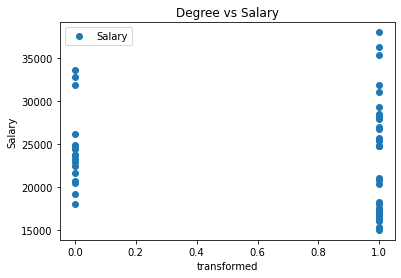

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [18]:
# there is no linear relation
#so we can try sqrt(x)
import numpy as np
df['transformed'] = np.sqrt(df['Degree']) # transformation of x to sqrt(x)
df.plot(x='transformed', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('transformed')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()

there is no linear relationship b/w Degree and Salary even after transformation...so we can drop the feature



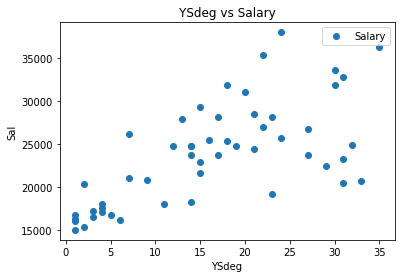

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [11]:
# 5. YSdeg v/s Salary
#we use scatter plot comparing 2 cont variables
import matplotlib.pyplot as plt
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Sal')
plt.show()
df[['YSdeg','Salary']].corr()

In [ ]:
#there is a +ve linear relation..so there is no need of transforming
#also there is no need of encode
#we can split the data

In [12]:
X = df[['Sex', 'Rank', 'Year', 'Degree','YSdeg']].values #features
y = df['Salary'].values  #target


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test

array([[ 0,  2,  8,  0, 31],
       [ 1,  3,  0,  0, 32],
       [ 0,  1,  2,  1,  3],
       [ 1,  1, 10,  0, 15],
       [ 0,  3, 13,  0, 30],
       [ 0,  3,  7,  1, 13],
       [ 1,  1,  1,  1,  1],
       [ 1,  3,  7,  1, 27],
       [ 0,  2, 11,  0, 14],
       [ 0,  3, 19,  0, 30],
       [ 0,  2,  3,  0,  7]])

In [14]:
X_train.shape, X_test.shape

((41, 5), (11, 5))

In [15]:
##its good to scale the data
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**Task 1:**  Find the linear regression equation for this data using columns 1-5 to column 6.

In [16]:
#fitting the model
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [17]:
#finding the values of m and c
coefficient= sal_reg.coef_
intercept= sal_reg.intercept_
y_pred = sal_reg.predict(X_test_scaled)

coefficient

array([ 530.31447888, 4359.13701803, 2300.08611472, -107.46027768,
       -449.36199501])

In [18]:
#printing the linear regression equation y=mx+c
print("Linear Regression Equation: y = {:.2f}*Sex + {:.2f}*Rank +{:.2f}*Year+ {:.2f}*Degree +{:.2f}*YSdeg  + {:.2f}".format(coefficient[0],coefficient[1],coefficient[2],coefficient[3],coefficient[4], intercept))

Linear Regression Equation: y = 530.31*Sex + 4359.14*Rank +2300.09*Year+ -107.46*Degree +-449.36*YSdeg  + 23603.63


In [19]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20525,22965.279254
1,24900,25871.329700
2,16500,16393.637045
3,21600,20692.058019
4,31850,30219.285116
5,27959,28232.662915
6,15000,17299.156519
7,26775,28817.202251
8,24742,25021.932593
9,33696,32753.111984


In [20]:
from sklearn import metrics
print('R2- SCORE for equation using all the columns:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns: 0.8854073910620004


**Task2:** Find the selection of columns with the best  R2  score.

In [21]:
#finding all the combinations r2-score

#Except the YSdeg feature
X = df[['Sex', 'Rank', 'Year', 'Degree']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except YSdeg:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except YSdeg: 0.7105101665250345


In [63]:
#Except the Degree feature
X = df[['Sex', 'Rank', 'Year', 'YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Degree:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Degree: 0.8292999072989351


In [23]:
#Except the Year feature

X = df[['Sex', 'Rank', 'Degree','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Year:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Year: 0.03435987954435371


In [24]:
#Except the Rank feature

X = df[['Sex', 'Year', 'Degree','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Rank:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Rank: 0.7544552403842948


In [26]:
#Except the Sex feature

X = df[['Rank','Year', 'Degree','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Sex:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Sex: 0.8558444385685209


In [27]:
#Except the Sex and Rank features

X = df[['Year', 'Degree','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Sex and Rank:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Sex and Rank: 0.2276524614331984


In [28]:
#Except the Sex and Year features

X = df[['Rank', 'Degree','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Sex and Year:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Sex and Year: 0.23294941585532625


In [29]:
#Except the Sex and Degree features

X = df[['Rank','Year', 'YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Sex and Degree:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Sex and Degree: 0.8229728217634953


In [30]:
#Except the Sex and YSdeg features

X = df[['Rank','Year', 'Degree']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Sex and YSdeg:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Sex and YSdeg: 0.7527468827341219


In [31]:
#Except the Rank and Year features

X = df[['Sex','Degree','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Rank and Year:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Rank and Year: 0.32306870146078814


In [32]:
#Except the Rank and Degree features

X = df[['Sex','Year','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Rank and Degree:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Rank and Degree: 0.6115567219203659


In [33]:
#Except the Rank and YSdeg features

X = df[['Sex','Year','Degree']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Rank and YSdeg:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Rank and YSdeg: 0.41293913834468843


In [34]:
#Except the Year and Degree features

X = df[['Sex', 'Rank', 'YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Year and Degree:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Year and Degree: 0.6167787833283254


In [35]:
#Except the Year and YSdeg features

X = df[['Sex', 'Rank', 'Degree']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Year and YSdeg:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Year and YSdeg: 0.7792172730266682


In [58]:
#Except the YSdeg and Degree features

X = df[['Sex', 'Rank', 'Year']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using all the columns except Degree and YSdeg:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns except Degree and YSdeg: 0.753935884322907


In [37]:
#For Sex and Rank features

X = df[['Sex', 'Rank']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Sex and Rank :', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using the columns Sex and Rank : 0.8467858952091964


In [38]:
#For Sex and Year features

X = df[['Sex', 'Year']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Sex and Year :', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using the columns Sex and Year : -0.12933269708900408


In [39]:
#For Sex and Degree features

X = df[['Sex', 'Degree']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Sex and Degree :', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using the columns Sex and Degree : -0.15014273250687848


In [40]:
#For Sex and YSdeg features

X = df[['Sex', 'YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Sex and YSdeg :', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using the columns Sex and YSdeg : 0.20073974329244904


In [61]:
#For Rank and Year features

X = df[['Rank','Year',]].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Rank and Year :', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using the columns Rank and Year : 0.8934156481710426


In [46]:
#For Rank and Degree features

X = df[['Rank','Degree',]].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Rank and Degree :', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Rank and Degree : 0.35755262504155594


In [48]:
#For Rank and YSdeg features

X = df[['Rank','YSdeg',]].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Rank and YSdeg :', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Rank and YSdeg : 0.8138456520998598


In [49]:
#For Year and Degree features

X = df[['Year','Degree']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Year and Degree:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Year and Degree: 0.12391283213069071


In [50]:
#For Year and YSdeg features

X = df[['Year','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Year and YSdeg:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Year and YSdeg: 0.4932169363286243


In [51]:
#For Degree and YSdeg features

X = df[['Degree','YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Degree and YSdeg:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Degree and YSdeg: 0.28390390710013247


In [52]:
#For YSdeg feature

X = df[['YSdeg']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns YSdeg:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns YSdeg: -0.21899133806990956


In [53]:
#For Degree feature

X = df[['Degree']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Degree:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Degree: -0.059635810396565514


In [54]:
#For Year feature

X = df[['Year']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Year:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Year: 0.021074880040600097


In [55]:
#For Rank feature

X = df[['Rank']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Rank:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Rank: 0.5403279492029252


In [57]:
#For Sex feature

X = df[['Sex']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the columns Sex:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the columns Sex: -0.09703508513232117


From all the combinations of columns...
The selection with the best R2-Score is using **Rank and Year** : **0.8934156481710426** (as seen above) which implies these are 2 main factors for the prediction of salary

However, all the factors(Sex, Rank, Year, Degree and YSdeg) taken together have a R2-Score of **0.8854073910620004** which is a good score implies it is next best model

**Task 3:** Report whether sex is a factor in salary.

In [67]:
#Fitting the model with the feature Sex

X = df[['Sex']].values #features
y = df['Salary'].values  #target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test
from sklearn.linear_model import LinearRegression
sal_reg=LinearRegression()
sal_reg.fit(X_train, y_train)
y_pred = sal_reg.predict(X_test)
from sklearn import metrics
print('R2- SCORE for equation using the column Sex:', metrics.r2_score(y_test,y_pred))

R2- SCORE for equation using the column Sex: -0.03239816044912991


From the above model, Sex on its own has a very low R2-Score which is less than zero (-0.03239816044912991), indicating that it has no direct influence on salary.

In [70]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


The correlation is also very weak which indicates Sex has no impact on the salary.
**There is no salary discrimination based on sex**